#### MOUNT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training

/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training


#### 라이브러리 불러오기

In [ ]:
import tensorboard

In [ ]:
import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

from torchvision import transforms, datasets

# 1. 데이터셋 정리(전처리)

In [ ]:
dir_data ='./dataset'

In [ ]:
## train/test/val 폴더 생성

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

In [ ]:
if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)
    print('train 생성')

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)
    print('val 생성')

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)
    print('test 생성')

### HGG 파일 내의 데이터를 input, label로 분류해서 dataset 안에 정리

In [ ]:
%pwd

'/content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training'

In [ ]:
import random

filename = os.listdir('./HGG')
fielname = random.shuffle(filename)
filecount = len(filename)
HGG1 = round(filecount*0.8)
HGG2 = round(filecount*0.9)

In [ ]:
import nibabel as nib

In [ ]:
#Htrain
filename_train = filename[:HGG1]

i=0
for a in filename_train:
  i+=1
  for b in os.listdir('./HGG/' + a):
    if 'seg' in b:
      img_label = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      label_= np.array(img_label)
      np.save(os.path.join(dir_save_train, 'label_%03d.npy' % (4*i-3)),label_)
      np.save(os.path.join(dir_save_train, 'label_%03d.npy' % (4*i-2)),label_)
      np.save(os.path.join(dir_save_train, 'label_%03d.npy' % (4*i-1)),label_)
      np.save(os.path.join(dir_save_train, 'label_%03d.npy' % (4*i)),label_)
    elif 'flair' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_train, 'input_%03d.npy' % (4*i-3)),input_)
    elif 't2' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_train, 'input_%03d.npy' % (4*i-2)),input_)
    elif 't1ce' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_train, 'input_%03d.npy' % (4*i-1)),input_)
    else :
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_train, 'input_%03d.npy' % (4*i)),input_)

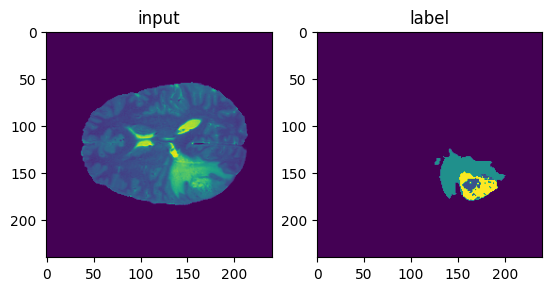

In [ ]:
## 이미지 시각화(input)
plt.subplot(122)
plt.imshow(label_[:,:,77])
plt.title('label')

plt.subplot(121)
plt.imshow(input_[:,:,77])
plt.title('input')

plt.show()

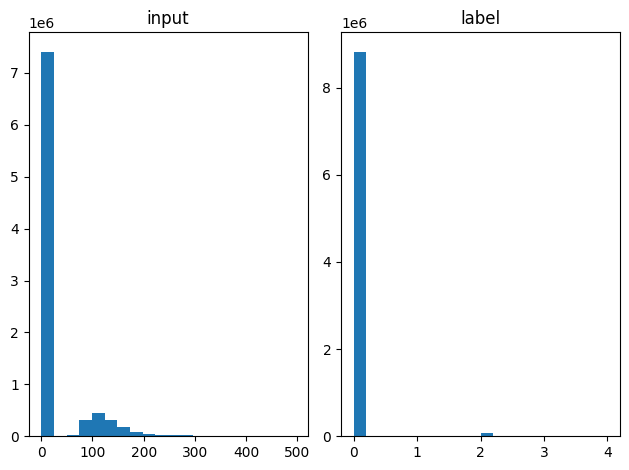

In [ ]:
## 한 이미지의 분포
plt.subplot(122)
plt.hist(label_.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input_.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()

In [ ]:
#Val
filename_val = filename[HGG1:HGG2]

i=0
for a in filename_val:
  i+=1
  for b in os.listdir('./HGG/' + a):
    if 'seg' in b:
      img_label = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      label_ = np.array(img_label)
      np.save(os.path.join(dir_save_val, 'label_%03d.npy' % (4*i-3)),label_)
      np.save(os.path.join(dir_save_val, 'label_%03d.npy' % (4*i-2)),label_)
      np.save(os.path.join(dir_save_val, 'label_%03d.npy' % (4*i-1)),label_)
      np.save(os.path.join(dir_save_val, 'label_%03d.npy' % (4*i)),label_)
    elif 'flair' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_val, 'input_%03d.npy' % (4*i-3)),input_)
    elif 't2' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_val, 'input_%03d.npy' % (4*i-2)),input_)
    elif 't1ce' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_val, 'input_%03d.npy' % (4*i-1)),input_)
    else :
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_val, 'input_%03d.npy' % (4*i)),input_)

In [ ]:
#Test
filename_test = filename[HGG2:]

i=0
for a in filename_test:
  i+=1
  for b in os.listdir('./HGG/' + a):
    if 'seg' in b:
      img_label = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      label_ = np.array(img_label)
      np.save(os.path.join(dir_save_test, 'label_%03d.npy' % (4*i-3)),label_)
      np.save(os.path.join(dir_save_test, 'label_%03d.npy' % (4*i-2)),label_)
      np.save(os.path.join(dir_save_test, 'label_%03d.npy' % (4*i-1)),label_)
      np.save(os.path.join(dir_save_test, 'label_%03d.npy' % (4*i)),label_)
    elif 'flair' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_test, 'input_%03d.npy' % (4*i-3)),input_)
    elif 't2' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_test, 'input_%03d.npy' % (4*i-2)),input_)
    elif 't1ce' in b:
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_test, 'input_%03d.npy' % (4*i-1)),input_)
    else :
      img_input = nib.load(os.path.join('./HGG',a, b)).get_fdata()
      input_ = np.array(img_input)
      np.save(os.path.join(dir_save_test, 'input_%03d.npy' % (4*i)),input_)

## U-Net 네트워크 구축하기

In [ ]:
## 라이브러리 불러오기
import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

from torchvision import transforms, datasets

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Convolution + BatchNormalization + Relu 정의하기
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)
            # nn.Sequential 클래스 : nn.ReLU 등의 모듈들을 인수로 받아서 순서대로 정렬해놓고
            #입력값이 들어오면, 순서대로 묘듈 실행해서 결과값 리턴
            # 리스트 이름에 별 붙여야함

            return cbr

        # 수축 경로(Contracting path)
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # 확장 경로(Expansive path)
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    # forward 함수 정의하기
    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

# 3-1. DataLoader

#### : 네트워크에 데이터를 올리기 위해 DataLoader로 구현

In [ ]:
# 데이터 로더를 구현하기
class Dataset(torch.utils.data.Dataset): #torch.utils.data.Dataset 상속
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        lst_data = os.listdir(self.data_dir)

        lst_label = [f for f in lst_data if f.startswith('label')]
        lst_input = [f for f in lst_data if f.startswith('input')]

        #정렬(오름차순)
        lst_label.sort()
        lst_input.sort()

        self.lst_label = lst_label
        self.lst_input = lst_input

    def __len__(self):
        return len(self.lst_label)

    def __getitem__(self, index):
        label = np.load(os.path.join(self.data_dir, self.lst_label[index]))
        input = np.load(os.path.join(self.data_dir, self.lst_input[index]))

        # 정규화
        label = label/255.0
        input = input/255.0

        # 이미지와 레이블의 차원 = 2일 경우(채널이 없을 경우, 흑백 이미지), 새로운 채널(축) 생성
        if label.ndim == 2:
            label = label[:, :, np.newaxis]
        if input.ndim == 2:
            input = input[:, :, np.newaxis]

        data = {'input': input, 'label': label}

        # transform이 정의되어 있다면 transform을 거친 데이터를 불러옴
        if self.transform:
            data = self.transform(data)

        return data

In [ ]:
# 데이터로더 잘 구현되었는지 확인
dataset_train = Dataset(data_dir=dir_save_train)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

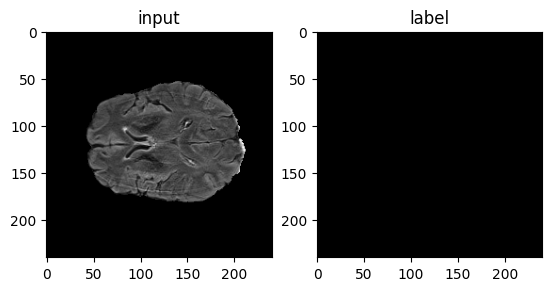

In [ ]:
# 불러온 이미지 시각화
plt.subplot(122)
plt.imshow(label.reshape(240,240), cmap='gray')
plt.title('label')

plt.subplot(121)
plt.imshow(input.reshape(240,240), cmap='gray')
plt.title('input')

plt.show()

## 3-2.Transform

- ToTensor : numpy에서 tensor로 데이터 type을 변경
- Normalization : 데이터 정규화
- RandomFlip : 랜덤 좌우 및 상하 반전
- ResizeImage : 이미지 사이즈 변경

In [ ]:
# 트렌스폼 구현하기
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms


class Grayscale(object):
    def __init__(self, num_output_channels):
        self.num_output_channels = num_output_channels

    def __call__(self, data):
        label, input = data['label'], data['input']

        # 이미지가 흑백이 아닌 경우에만 변환 적용
        if label.shape[0] != 1 and label.shape[0] != 3:
            grayscale_transform = transforms.Grayscale(num_output_channels=self.num_output_channels)
            label = grayscale_transform(label)
            input = grayscale_transform(input)

        data = {'label': label, 'input': input}

        return data

class ToTensor(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        label = label.transpose((2, 0, 1)).astype(np.float32)
        input = input.transpose((2, 0, 1)).astype(np.float32)

        data = {'label': torch.from_numpy(label), 'input': torch.from_numpy(input)}

        return data

class ResizeImage:
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, data):
        label, input = data['label'], data['input']

        # 이미지 크기 변경
        label = F.interpolate(label.unsqueeze(0), size=self.output_size, mode='bilinear', align_corners=False)
        label = label.squeeze(0)

        input = F.interpolate(input.unsqueeze(0), size=self.output_size, mode='bilinear', align_corners=False)
        input = input.squeeze(0)

        data = {'label': label, 'input': input}

        return data

class MinMaxNormalization(object):
    def __init__(self, min_val=0, max_val=1):
        self.min_val = min_val
        self.max_val = max_val

    def __call__(self, data):
        label, input = data['label'], data['input']

        input = (input - input.min()) / (input.max() - input.min())
        input = input * (self.max_val - self.min_val) + self.min_val

        data = {'label': label, 'input': input}

        return data


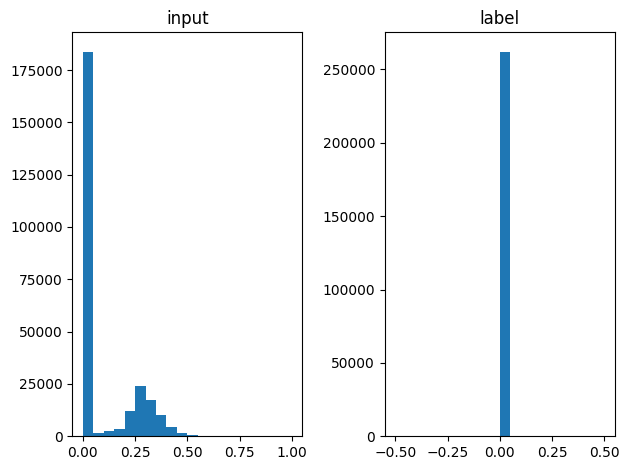

In [ ]:
# 트랜스폼 잘 구현되었는지 확인
transform = transforms.Compose([ToTensor(),
                                #Grayscale(num_output_channels=1),
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])

dataset_train = Dataset(data_dir=dir_save_train, transform=transform)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

# 불러온 이미지 시각화
plt.subplot(122)
plt.hist(label.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()

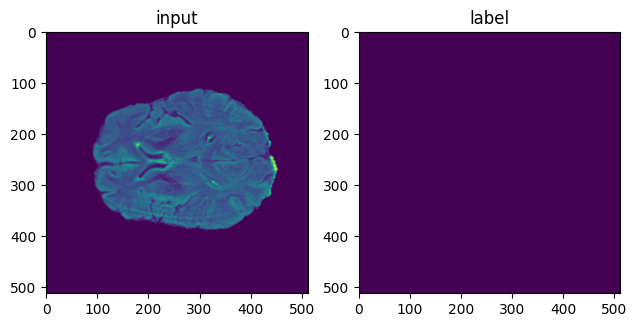

In [ ]:
plt.subplot(122)
plt.imshow(label[0,:,:])
plt.title('label')

plt.subplot(121)
plt.imshow(input[0,:,:])
plt.title('input')

plt.tight_layout()
plt.show()

In [ ]:
label.size()

torch.Size([1, 512, 512])

## 4. 네트워크 저장/불러오는 함수 정의하기

In [ ]:
## 네트워크 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## 네트워크 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[-1]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch

## 5. 네트워크 훈련하기

In [ ]:
# 훈련 파라미터 설정하기
lr = 1e-3
batch_size = 4
num_epoch = 20

base_dir = './unet'
data_dir = dir_data
ckpt_dir = os.path.join(base_dir, "checkpoint")
log_dir = os.path.join(base_dir, "log")

In [ ]:
# 훈련을 위한 Transform과 DataLoader
transform = transforms.Compose([ToTensor(),
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])

dataset_train = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=8)

dataset_val = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=8)

# 네트워크 생성하기
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = UNet().to(device)

# 손실함수 정의하기
fn_loss = nn.BCEWithLogitsLoss().to(device)

# Optimizer 설정하기
optim = torch.optim.Adam(net.parameters(), lr=lr)

# 그밖에 부수적인 variables 설정하기
num_data_train = len(dataset_train)
num_data_val = len(dataset_val)

num_batch_train = np.ceil(num_data_train / batch_size)
num_batch_val = np.ceil(num_data_val / batch_size)

# 그 밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Tensorboard 를 사용하기 위한 SummaryWriter 설정
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

In [ ]:
# 네트워크 학습시키기
st_epoch = 0
# 학습한 모델이 있을 경우 모델 로드하기
net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

In [ ]:
for epoch in range(st_epoch + 1, num_epoch + 1):
        net.train()
        loss_arr = []

        for batch, data in enumerate(loader_train, 1):
            # forward pass
            label = data['label'].to(device)
            input = data['input'].to(device)

            output = net(input)

            # backward pass
            optim.zero_grad()

            loss = fn_loss(output, label)
            loss.backward()

            optim.step()

            # 손실함수 계산
            loss_arr += [loss.item()]

            print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                  (epoch, num_epoch, batch, num_batch_train, np.mean(loss_arr)))

            # Tensorboard 저장하기
            label = fn_tonumpy(label)
            input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
            output = fn_tonumpy(fn_class(output))

            writer_train.add_image('label', label, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
            writer_train.add_image('input', input, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
            writer_train.add_image('output', output, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')

        writer_train.add_scalar('loss', np.mean(loss_arr), epoch)

        with torch.no_grad():
            net.eval()
            loss_arr = []

            for batch, data in enumerate(loader_val, 1):
                # forward pass
                label = data['label'].to(device)
                input = data['input'].to(device)

                output = net(input)

                # 손실함수 계산하기
                loss = fn_loss(output, label)

                loss_arr += [loss.item()]

                print("VALID: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                      (epoch, num_epoch, batch, num_batch_val, np.mean(loss_arr)))

                # Tensorboard 저장하기
                label = fn_tonumpy(label)
                input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
                output = fn_tonumpy(fn_class(output))

                writer_val.add_image('label', label, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
                writer_val.add_image('input', input, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
                writer_val.add_image('output', output, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')

        writer_val.add_scalar('loss', np.mean(loss_arr), epoch)

        # epoch 50마다 모델 저장하기
        if epoch % 50 == 0:
            save(ckpt_dir=ckpt_dir, net=net, optim=optim, epoch=epoch)

        writer_train.close()
        writer_val.close()

TRAIN: EPOCH 0001 / 0020 | BATCH 0001 / 0003 | LOSS 0.6493
TRAIN: EPOCH 0001 / 0020 | BATCH 0002 / 0003 | LOSS 0.6199
TRAIN: EPOCH 0001 / 0020 | BATCH 0003 / 0003 | LOSS 0.5847
VALID: EPOCH 0001 / 0020 | BATCH 0001 / 0001 | LOSS 0.6464
TRAIN: EPOCH 0002 / 0020 | BATCH 0001 / 0003 | LOSS 0.4652
TRAIN: EPOCH 0002 / 0020 | BATCH 0002 / 0003 | LOSS 0.4475
TRAIN: EPOCH 0002 / 0020 | BATCH 0003 / 0003 | LOSS 0.4313
VALID: EPOCH 0002 / 0020 | BATCH 0001 / 0001 | LOSS 0.6342
TRAIN: EPOCH 0003 / 0020 | BATCH 0001 / 0003 | LOSS 0.3812
TRAIN: EPOCH 0003 / 0020 | BATCH 0002 / 0003 | LOSS 0.3771
TRAIN: EPOCH 0003 / 0020 | BATCH 0003 / 0003 | LOSS 0.3700
VALID: EPOCH 0003 / 0020 | BATCH 0001 / 0001 | LOSS 0.3817
TRAIN: EPOCH 0004 / 0020 | BATCH 0001 / 0003 | LOSS 0.3449
TRAIN: EPOCH 0004 / 0020 | BATCH 0002 / 0003 | LOSS 0.3401
TRAIN: EPOCH 0004 / 0020 | BATCH 0003 / 0003 | LOSS 0.3387
VALID: EPOCH 0004 / 0020 | BATCH 0001 / 0001 | LOSS 0.4207
TRAIN: EPOCH 0005 / 0020 | BATCH 0001 / 0003 | LOSS 0.32

## 6. 훈련된 모델 테스트하기

In [ ]:
transform = transforms.Compose([ToTensor(),
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])

dataset_test = Dataset(data_dir=os.path.join(data_dir, 'test'), transform=transform)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=2)

# 그밖에 부수적인 variables 설정하기
num_data_test = len(dataset_test)
num_batch_test = np.ceil(num_data_test / batch_size)

# 결과 디렉토리 생성하기
result_dir = os.path.join(base_dir, 'result')
if not os.path.exists(result_dir):
    os.makedirs(os.path.join(result_dir, 'png'))
    os.makedirs(os.path.join(result_dir, 'numpy'))


net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

with torch.no_grad():
      net.eval()
      loss_arr = []

      for batch, data in enumerate(loader_test, 1):
          # forward pass
          label = data['label'].to(device)
          input = data['input'].to(device)

          output = net(input)

          # 손실함수 계산하기
          loss = fn_loss(output, label)
          loss_arr += [loss.item()]

          print("TEST: BATCH %04d / %04d | LOSS %.4f" %
                (batch, num_batch_test, np.mean(loss_arr)))

          # Tensorboard 저장하기
          label = fn_tonumpy(label)
          input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
          output = fn_tonumpy(fn_class(output))

          # 테스트 결과 저장하기
          for j in range(label.shape[0]):
              id = num_batch_test * (batch - 1) + j

              plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), label[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'input_%04d.png' % id), input[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'output_%04d.png' % id), output[j].squeeze(), cmap='gray')

              np.save(os.path.join(result_dir, 'numpy', 'label_%04d.npy' % id), label[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'input_%04d.npy' % id), input[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'output_%04d.npy' % id), output[j].squeeze())

print("AVERAGE TEST: BATCH %04d / %04d | LOSS %.4f" %
        (batch, num_batch_test, np.mean(loss_arr)))

TEST: BATCH 0001 / 0001 | LOSS 0.2228
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.2228


## 7. 결과 시각화하기

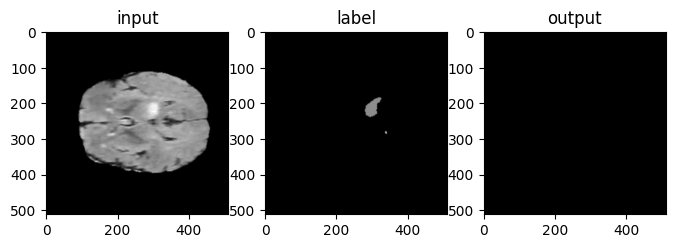

In [ ]:
##
base_dir = './unet'
result_dir = os.path.join(base_dir, 'result')
lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

lst_label = [f for f in lst_data if f.startswith('label')]
lst_input = [f for f in lst_data if f.startswith('input')]
lst_output = [f for f in lst_data if f.startswith('output')]

lst_label.sort()
lst_input.sort()
lst_output.sort()

##
id = 0

label = np.load(os.path.join(result_dir,"numpy", lst_label[id]))
input = np.load(os.path.join(result_dir,"numpy", lst_input[id]))
output = np.load(os.path.join(result_dir,"numpy", lst_output[id]))

## 플롯 그리기
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()


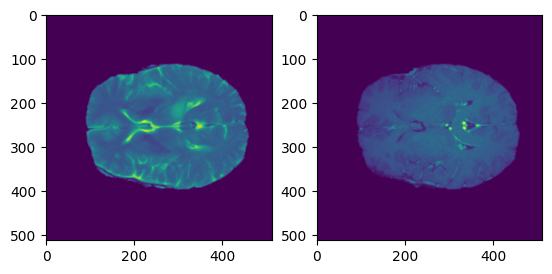

In [ ]:
a=np.load('./unet/result/numpy/input_0001.npy')
plt.subplot(121)
plt.imshow(a)

b=np.load('./unet/result/numpy/input_0002.npy')
plt.subplot(122)
plt.imshow(b)

In [ ]:
## 플롯 그리기
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()
